# Imports

In [1]:
import os
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from spellchecker import SpellChecker
from gensim.models import Word2Vec
import re
import nltk
import contractions
from datetime import datetime
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Bidirectional
import numpy as np
import spacy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle
import seaborn as sns

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

2024-10-10 22:54:07.116129: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/joaocosta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/joaocosta/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
# Reading the file and converting it to a DataFrame
def read_file_to_dataframe(filename):
    data = []
    
    with open("./data/" + filename, 'r', encoding='utf-8') as file:
        for linha in file:
            linha = linha.strip()  # Remove leading/trailing spaces and newlines
            filme = linha.split('\t')  # Split by tab
            data.append(filme)  # Append the row to the data list
    
    # Convert the list of rows to a pandas DataFrame
    df = pd.DataFrame(data)
    
    return df


# Variaveis onde está os ficheiros de treino e o modelo

In [3]:
#file onde já está o modelo treinado"
model=None
newPKL = "joao3"


#limpesa de ficheiro de treino
data="train"
#ficheiro onde vai ser feita ao autoavaliacao
avaliation = "test_no_labels"

In [4]:
print("\033[34mData to DataFrame\n\033[0m")
# Example usage
df = read_file_to_dataframe(data+".txt")
print(df)

Data to DataFrame

                              0          1        2                        3  \
0                  Ela Cheppanu     Telugu  romance                   Ramana   
1     A Nightmare on Elm Street   American   horror             Samuel Bayer   
2               American Gothic   American   horror               John Hough   
3                          Gang  Bollywood    crime              Mazhar Khan   
4            Intimate Relations    British    drama            Charles Frank   
...                         ...        ...      ...                      ...   
8036              Sa 'Yo Lamang   Filipino    drama          Laurice Guillen   
8037          The Lemon Sisters   American    drama             Joyce Chopra   
8038      Dil Ne Phir Yaad Kiya  Bollywood  romance                  Unknown   
8039  Rehnaa Hai Terre Dil Mein  Bollywood  romance            Gautham Menon   
8040             Things to Come    British   sci-fi  William Cameron Menzies   

                    

8041
Average word count: 370.33


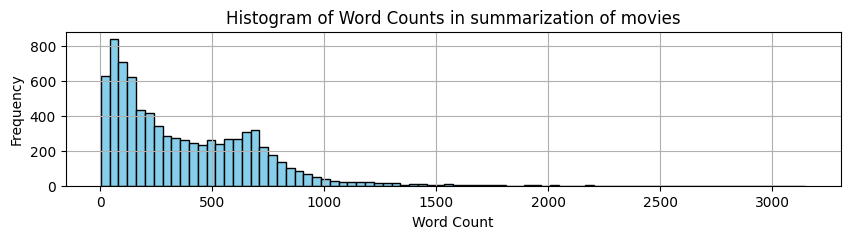

In [5]:
# histogram of word count
print(len(df))

df['word_count'] = df[4].apply(lambda x: len(x.split()))
avg_word_count = df['word_count'].mean()
print(f'Average word count: {avg_word_count:.2f}')
# Plotting the histogram of word counts
plt.figure(figsize=(10, 2))
plt.hist(df['word_count'], bins=80, color='skyblue', edgecolor='black')
plt.title('Histogram of Word Counts in summarization of movies')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


the: 161014
to: 111607
and: 106034
a: 80092
of: 53504
is: 49072
his: 43843
in: 43811
he: 30869
that: 30744


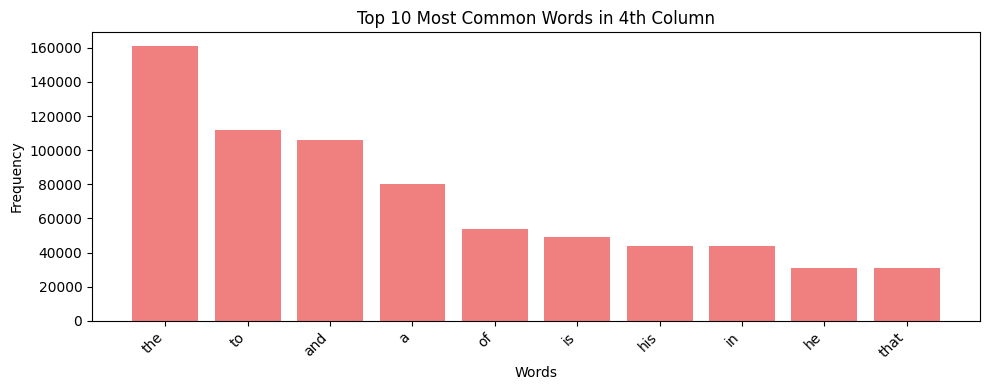

In [6]:
# Flatten all words from the 4th column into a single list
all_words = [word for row in df[4] for word in row.split()]

word_counter = Counter(all_words)

top_10_words = word_counter.most_common(10)

for word, count in top_10_words:
    print(f"{word}: {count}")

words, counts = zip(*top_10_words)

plt.figure(figsize=(10, 4))
plt.bar(words, counts, color='lightcoral')
plt.title('Top 10 Most Common Words in 4th Column')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate word labels for better readability
plt.tight_layout()
plt.show()

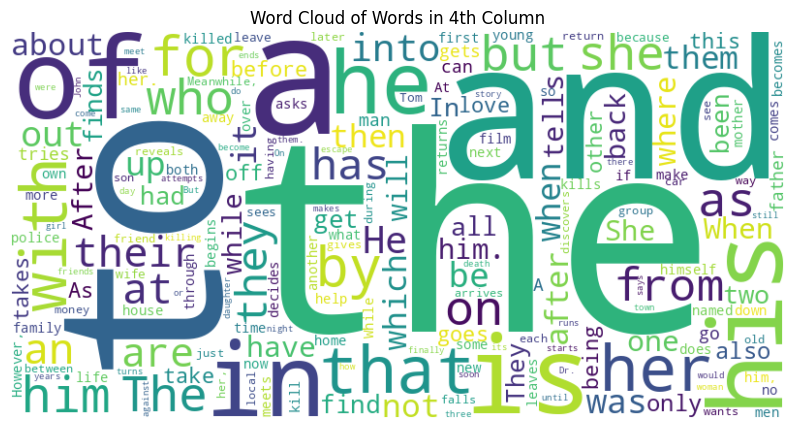

In [7]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counter)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud of Words in 4th Column')
plt.show()

In [8]:
# Check for typos using the pyspellchecker
spell = SpellChecker()
misspelled_words = spell.unknown(all_words)  # Identify misspelled words

# Display the number of potential typos
print(f"Number of potential typos: {len(misspelled_words)}")

# Optionally, print the misspelled words
print("\nPotential typos detected:")
for word in misspelled_words:
    print(word)

Number of potential typos: 110045

Potential typos detected:
foray,
again!
(andrea
wyborne
vaselli's
budd
wives,
olympic
neikov),
bodyguard)
extremists,
tung's
jaya.
vince,
larue
fowles'
(harvey
not,
soul.[2]
cop.
burglaries,
idol)
khurana
phibes
misunderstood.
(kouta
lady).[3]
spacex
circumcision.
park,
ex-boyfriend.
horses)
die.
tannen),
crouches,
henri,
mady)
connection?
ackroyd
albrecht
verónico's
mcklusky
croc
jourdan)
gunman),
rostron,
slapjack,
(dave
lutch's
bickford
$1000
self-defence
applications,
reynard
wattis).
(corin
(cheung
hans
ajgor
bower),
turner);
miscoded
miss,
adamsky,
hideaway.
life.[7][8]
manchodu
one-antlered
interludes,
pippa
pyramid),
rukmini.
ryback's
corners;
zilpah,
singh
whisky,
bill)
daytime.
ghostly.
irishmen.
kaniyakumari.
sir,
kuzcotopia.
chickasaw
credited,
msgt
gert.
terrorism.
athmanandam,
kelby's
oscillator,
plateau.
waterston),
babbit
atm,
springfield,
crocodiles.
estate.
lal),soumitran
nix,
fujioka
breathe.
firm)
yakuza.
nekron’s
zekrom/reshiram
d

## Pre Processamento

In [9]:
# Function to standardize dates
def standardize_dates(text):
    def _month_to_number(month_name):
        try:
            return datetime.strptime(month_name, "%b").month  # Abbreviated month names (e.g., "Feb")
        except ValueError:
            try:
                return datetime.strptime(month_name, "%B").month  # Full month names (e.g., "February")
            except ValueError:
                return None  # Return None for invalid month names

    def _handle_two_digit_year(year):
        if not year:  # If year is None or empty
            return ""
        year = int(year)
        return year + 2000 if year < 100 else year

    # Date normalization using regex
    text = re.sub(
        r'(\b[A-Za-z]+) (\d{1,2})(?:st|nd|rd|th)?(?:,)? (\d{4})?',
        lambda match: (
            f"{int(match.group(2)):02d}/{_month_to_number(match.group(1)):02d}/{match.group(3)}"
            if _month_to_number(match.group(1)) is not None and match.group(3)  # Ensure month and year exist
            else f"{int(match.group(2)):02d}/{_month_to_number(match.group(1)):02d}"
            if _month_to_number(match.group(1)) is not None  # Ensure month exists
            else match.group(0)  # Return original text if invalid month
        ),
        text
    )

    # Handle formats like "8-Feb-2013"
    text = re.sub(
        r'(\d{1,2})(?:st|nd|rd|th)?[-/.](\b[A-Za-z]+)\b[-/.]?(\d{2,4})?',
        lambda match: (
            f"{int(match.group(1)):02d}/{_month_to_number(match.group(2)):02d}/{_handle_two_digit_year(match.group(3))}"
            if _month_to_number(match.group(2)) is not None and match.group(3)  # Ensure month and year exist
            else f"{int(match.group(1)):02d}/{_month_to_number(match.group(2)):02d}"
            if _month_to_number(match.group(2)) is not None  # Ensure month exists
            else match.group(0)  # Return original text if invalid month
        ),
        text
    )

    return text

In [10]:
# lowercasing
def lowercase_text(text):
    return text.lower()

In [11]:
# stop words
stop_words = set(stopwords.words('english'))
def remove_stopwords(text, stop_words=stop_words):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words and word.lower()]
    return " ".join(filtered_words)

In [12]:
#contractions
def expand_contractions(text):
    if not isinstance(text, str) or not text:
        # Return an empty string or the original text if it's not a valid string
        return text

    try:
        # Use contractions.fix to expand contractions in the text
        return contractions.fix(text)
    except IndexError as e:
        print(f"IndexError encountered: {e}")
        # Optionally return the original text if there's an error
        return text


In [13]:
# Remove punctuation except for specific cases like "Dr." or "Mr."
def remove_punctuation(text):
    # Replace specific abbreviations with placeholders
    text = re.sub(r'\b(Dr|Mr|Ms|Mrs)\.', r'\1_PLACEHOLDER_', text)
    
    # Remove all punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Restore the abbreviations
    text = text.replace('_PLACEHOLDER_', '.')
    
    return text

In [14]:
nlp = spacy.load("en_core_web_sm")

def lemmatize_text(text):
    # Process the text with spaCy
    doc = nlp(text)
    # Extract and return lemmatized words
    lemmatized_words = [token.lemma_ for token in doc]
    return " ".join(lemmatized_words)

In [15]:
def remove_references(text):
    # Substituir ".[\d]" por "."
    text = re.sub(r'\.\[\d+\]', '.', text)
    
    return text

In [16]:
print("\033[34mPre Processing the data\n\033[0m")
def preprocess_text(text):
    text = expand_contractions(text)       # Step 1: Expand contractions
    text = standardize_dates(text)         # Step 2: Normalize dates
    text = lowercase_text(text)            # Step 3: Convert to lowercase
    text = remove_punctuation(text)        # Step 4: Remove punctuation but keep specific cases
    text = remove_stopwords(text)          # Step 5: Remove stopwords
    text = lemmatize_text(text)            # Step 6: Lemmatize the text
    text = remove_references(text)         # Step 7: Remove references
    return text

# Example usage

df.iloc[:, 4] = df.iloc[:, 4].apply(preprocess_text)

print("\033[32mPre Processing Completed!\n\033[0m")

Pre Processing the data

IndexError encountered: string index out of range
IndexError encountered: string index out of range
Pre Processing Completed!



## Carregar o modelo ou Criar um novo
#### Conforme o nome dado a variavel 'newPKL'

In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from transformers import DistilBertTokenizer, DistilBertModel
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming df contains the dataset with genres in column 2 and plots in column 4
genres = df.iloc[:, 2]
plots = df.iloc[:, 4]

# Encode genres into numerical labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(genres)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(plots, y, test_size=0.2, random_state=42)

# Load pre-trained DistilBERT tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
distilbert_model = DistilBertModel.from_pretrained('distilbert-base-uncased')

# Tokenize the movie plots
def tokenize_plots(plots, tokenizer, max_length=256):
    return tokenizer(plots.tolist(), padding=True, truncation=True, max_length=max_length, return_tensors='pt')

# Tokenize training and test data
train_encodings = tokenize_plots(X_train, tokenizer)
test_encodings = tokenize_plots(X_test, tokenizer)

# Create PyTorch datasets
train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], torch.tensor(y_train))
test_dataset = TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'], torch.tensor(y_test))

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=False, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=8, num_workers=0)

# Extract features using the pre-trained DistilBERT model (no fine-tuning)
def extract_features(model, loader):
    model.eval()
    features = []
    with torch.no_grad():
        for batch in loader:
            input_ids, attention_mask, _ = batch
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            pooled_output = outputs[0][:, 0]  # CLS token output (first token)
            features.append(pooled_output.cpu().numpy())
    return np.concatenate(features, axis=0)

# Get features for training and test sets
train_features = extract_features(distilbert_model, train_loader)
test_features = extract_features(distilbert_model, test_loader)

# Train an SVM on the extracted features
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(train_features, y_train)

# Make predictions and evaluate
y_pred = svm_classifier.predict(test_features)
accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Accuracy: {accuracy}')

SVM Accuracy: 0.651336233685519


In [20]:
dfref = read_file_to_dataframe("top_secret_69.txt")

# Preprocess the plots and true genres
dfref.iloc[:, 1] = dfref.iloc[:, 1].apply(preprocess_text)  # Column 2 contains plots
new_plots = dfref.iloc[:, 1]
genres = dfref.iloc[:, 0]  # Column 1 contains the true genres

# Encode the true genres using the same LabelEncoder
y_true_new = label_encoder.transform(genres)

# Tokenize and extract features from the new plots
new_encodings = tokenize_plots(new_plots, tokenizer)
new_dataset = TensorDataset(new_encodings['input_ids'], new_encodings['attention_mask'])
new_loader = DataLoader(new_dataset, batch_size=8, num_workers=0)
new_features = extract_features(distilbert_model, new_loader)

# Predict genres using the trained SVM model
new_predictions = svm_classifier.predict(new_features)

# Decode the predicted genres back to their names
predicted_genres = label_encoder.inverse_transform(new_predictions)

# Output the predicted genres for each plot
for i, genre in enumerate(predicted_genres):
    print(f'Plot {i+1}: Predicted genre = {genre}')

# Calculate the accuracy using the true genres
accuracy_new = accuracy_score(y_true_new, new_predictions)
print(f'SVM Accuracy on new data: {accuracy_new}')

IndexError: single positional indexer is out-of-bounds